# Creating an SVM Model for classifying Music Genre

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
import librosa
import librosa.display
from sklearn.model_selection import train_test_split
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn import svm
from matplotlib.pyplot import figure
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV

## Loading the dataset

In [2]:
df = pd.read_csv('features_3_sec.csv')

In [3]:
df

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,rock.00099.5.wav,66149,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.886443,1718.707215,85931.574523,...,42.485981,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969,rock
9986,rock.00099.6.wav,66149,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,...,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033,rock
9987,rock.00099.7.wav,66149,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.246325,1561.859087,138762.841945,...,78.228149,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990,rock
9988,rock.00099.8.wav,66149,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.039161,2018.366254,22860.992562,...,28.323744,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750,rock


## Removing data that is not required/useful

In [4]:
df.drop('filename', inplace=True, axis=1)
df.drop('length', inplace=True, axis=1)

In [5]:
df

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,1.080790e+06,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,6.722448e+05,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,7.907127e+05,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,9.216524e+05,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,6.102111e+05,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.886443,1718.707215,85931.574523,3015.559458,8.479527e+05,...,42.485981,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969,rock
9986,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,3746.694524,1.170890e+06,...,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033,rock
9987,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.246325,1561.859087,138762.841945,2442.362154,2.602871e+06,...,78.228149,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990,rock
9988,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.039161,2018.366254,22860.992562,4313.266226,4.968878e+05,...,28.323744,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750,rock


## Allocating the X and Y data & Splitting the data

In [6]:
# Labels
y_data = df['label']

# X Data
x_data = df.loc[:, df.columns != 'label']

# Normalizing the X Data
data_columns = x_data.columns
data_scaler = preprocessing.MinMaxScaler()
x_scaled = data_scaler.fit_transform(x_data)
X = pd.DataFrame(x_scaled, columns=data_columns)

In [7]:
# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y_data, test_size=0.2, random_state=42)

## Randomly training a SVM model without hyperparameterizing

In [8]:
random_svm = SVC(kernel='rbf', C= 10, gamma= 0.1, decision_function_shape="ovo")
random_svm.fit(X_train, y_train)
y_pred = random_svm.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print('Accuracy SMV:', round(accuracy_score(y_test, y_pred), 5), '\n')

[[164   3  12   5   1   6   8   0   4   5]
 [  0 197   0   0   0   6   0   0   0   0]
 [ 13   2 137  10   0   8   0   4   2  10]
 [  2   5   6 140   9   2   5   3  12  15]
 [ 10   1   8  10 166   0   5   7   8   3]
 [  7  17   6   0   0 158   0   1   1   2]
 [  6   0   1   3   1   0 185   0   0   8]
 [  0   0   5   7   5   1   0 157   2   3]
 [  5   1  14  14   8   3   5   7 149   5]
 [ 11   1  14  27   3   7  13   5   6 110]]
Accuracy SMV: 0.78228 



In [9]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       blues       0.75      0.79      0.77       208
   classical       0.87      0.97      0.92       203
     country       0.67      0.74      0.70       186
       disco       0.65      0.70      0.67       199
      hiphop       0.86      0.76      0.81       218
        jazz       0.83      0.82      0.83       192
       metal       0.84      0.91      0.87       204
         pop       0.85      0.87      0.86       180
      reggae       0.81      0.71      0.75       211
        rock       0.68      0.56      0.61       197

    accuracy                           0.78      1998
   macro avg       0.78      0.78      0.78      1998
weighted avg       0.78      0.78      0.78      1998



## Grid Search with Cross Validation

In [10]:
grid_param = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'poly', 'linear']} 

In [11]:
grid = GridSearchCV(SVC(), grid_param, refit=True, verbose=2, cv=10)
grid.fit(X_train,y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.9s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.9s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.8s
[CV] END ........................C=0.1, gamma=

[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   2.9s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   2.9s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   2.9s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   2.9s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   3.0s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   2.9s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   2.9s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   2.9s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   2.9s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   1.3s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   1.3s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   1.3s
[CV] END ..................C

[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.9s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.9s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.9s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.9s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.9s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.9s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.9s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   2.6s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   2.6s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   2.6s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   2.7s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   2.6s
[CV] END ...................

[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   1.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   1.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   1.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   1.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   1.0s
[CV] END .........................C=10, gamma=1, kernel=poly; total time=   1.4s
[CV] END .........................C=10, gamma=1, kernel=poly; total time=   1.4s
[CV] END .........................C=10, gamma=1, kernel=poly; total time=   1.5s
[CV] END .........................C=10, gamma=1, kernel=poly; total time=   1.4s
[CV] END .........................C=10, gamma=1, kernel=poly; total time=   1.4s
[CV] END .........................C=10, gamma=1, kernel=poly; total time=   1.4s
[CV] END .........................C=10, gamma=1, kernel=poly; total time=   1.4s
[CV] END ...................

[CV] END .....................C=10, gamma=0.001, kernel=poly; total time=   2.9s
[CV] END .....................C=10, gamma=0.001, kernel=poly; total time=   2.9s
[CV] END .....................C=10, gamma=0.001, kernel=poly; total time=   2.9s
[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=   0.8s
[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=   0.8s
[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=   0.8s
[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=   0.8s
[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=   0.8s
[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=   0.8s
[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=   0.8s
[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=   0.8s
[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=   0.8s
[CV] END ...................

[CV] END ....................C=100, gamma=0.1, kernel=linear; total time=   1.4s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   1.2s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   1.2s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   1.2s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   1.2s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   1.2s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   1.2s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   1.2s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   1.2s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   1.2s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   1.2s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   2.0s
[CV] END ...................

[CV] END .......................C=1000, gamma=1, kernel=poly; total time=   1.5s
[CV] END .......................C=1000, gamma=1, kernel=poly; total time=   1.5s
[CV] END .......................C=1000, gamma=1, kernel=poly; total time=   1.5s
[CV] END .......................C=1000, gamma=1, kernel=poly; total time=   1.5s
[CV] END .......................C=1000, gamma=1, kernel=poly; total time=   1.5s
[CV] END .......................C=1000, gamma=1, kernel=poly; total time=   1.5s
[CV] END .......................C=1000, gamma=1, kernel=poly; total time=   1.5s
[CV] END .......................C=1000, gamma=1, kernel=poly; total time=   1.5s
[CV] END .......................C=1000, gamma=1, kernel=poly; total time=   1.4s
[CV] END .....................C=1000, gamma=1, kernel=linear; total time=   6.5s
[CV] END .....................C=1000, gamma=1, kernel=linear; total time=   6.8s
[CV] END .....................C=1000, gamma=1, kernel=linear; total time=   6.8s
[CV] END ...................

[CV] END .................C=1000, gamma=0.001, kernel=linear; total time=   7.5s
[CV] END .................C=1000, gamma=0.001, kernel=linear; total time=   7.2s
[CV] END .................C=1000, gamma=0.001, kernel=linear; total time=   8.0s
[CV] END .................C=1000, gamma=0.001, kernel=linear; total time=   7.3s
[CV] END .................C=1000, gamma=0.001, kernel=linear; total time=   8.0s
[CV] END .................C=1000, gamma=0.001, kernel=linear; total time=   7.6s
[CV] END .................C=1000, gamma=0.001, kernel=linear; total time=   7.4s
[CV] END ...................C=1000, gamma=0.0001, kernel=rbf; total time=   1.7s
[CV] END ...................C=1000, gamma=0.0001, kernel=rbf; total time=   1.8s
[CV] END ...................C=1000, gamma=0.0001, kernel=rbf; total time=   1.8s
[CV] END ...................C=1000, gamma=0.0001, kernel=rbf; total time=   1.7s
[CV] END ...................C=1000, gamma=0.0001, kernel=rbf; total time=   1.7s
[CV] END ...................

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'linear']},
             verbose=2)

## Printing out the best parameters for SVM

In [12]:
print(grid.best_params_)

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}


### More visual Data

In [13]:
cv_results = pd.DataFrame(grid.cv_results_)
cv_results.iloc[grid.best_index_]

mean_fit_time                                        0.747037
std_fit_time                                          0.00346
mean_score_time                                      0.295626
std_score_time                                       0.013628
param_C                                                  1000
param_gamma                                                 1
param_kernel                                              rbf
params               {'C': 1000, 'gamma': 1, 'kernel': 'rbf'}
split0_test_score                                     0.91375
split1_test_score                                      0.9125
split2_test_score                                    0.922403
split3_test_score                                    0.913642
split4_test_score                                    0.907384
split5_test_score                                     0.90363
split6_test_score                                    0.909887
split7_test_score                                    0.923655
split8_t

## Creating the best model

In [18]:
svm_model_best = SVC(kernel='rbf', C= 1000, gamma= 1, decision_function_shape="ovo")
svm_model_best.fit(X_train, y_train)
y_pred = svm_model_best.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print('Accuracy SMV:', round(accuracy_score(y_test, y_pred), 5), '\n')

[[199   0   2   1   2   3   0   0   1   0]
 [  1 198   0   0   0   4   0   0   0   0]
 [ 10   0 167   0   0   3   0   2   2   2]
 [  3   2   2 180   1   0   0   3   1   7]
 [  1   1   6   2 201   0   0   3   0   4]
 [  2   6   3   0   0 180   0   0   1   0]
 [  2   0   1   0   0   0 199   0   0   2]
 [  0   0   1   1   3   2   0 172   1   0]
 [  0   1   2   3   5   2   0   1 196   1]
 [  3   1   9   9   1   2   6   0   3 163]]
Accuracy SMV: 0.92843 



In [19]:
print(metrics.classification_report(y_test,y_pred))
#0.92893

              precision    recall  f1-score   support

       blues       0.90      0.96      0.93       208
   classical       0.95      0.98      0.96       203
     country       0.87      0.90      0.88       186
       disco       0.92      0.90      0.91       199
      hiphop       0.94      0.92      0.93       218
        jazz       0.92      0.94      0.93       192
       metal       0.97      0.98      0.97       204
         pop       0.95      0.96      0.95       180
      reggae       0.96      0.93      0.94       211
        rock       0.91      0.83      0.87       197

    accuracy                           0.93      1998
   macro avg       0.93      0.93      0.93      1998
weighted avg       0.93      0.93      0.93      1998



In [20]:
cm = confusion_matrix(y_test, y_pred)

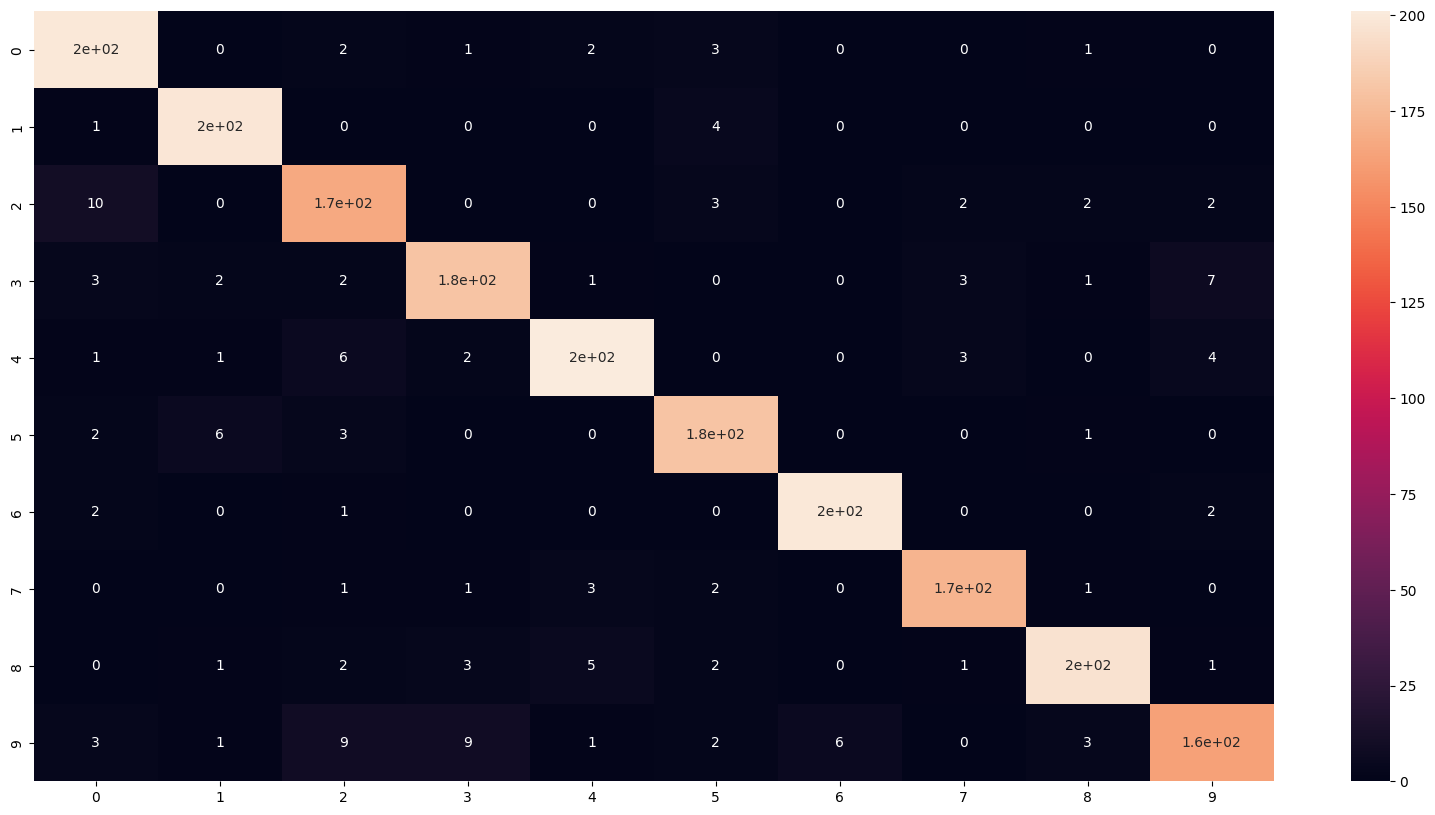

In [21]:
plt.figure(figsize=(20, 10))
sns.heatmap(cm, annot=True)
plt.show()